In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import inspect
warnings.filterwarnings('ignore')
import cognitive_functions as cf
import primitive_fucntions as pf
from utils import Stopwatch, Element, Associations, ElementSet, pretty_view
from collections import defaultdict
import random


In [11]:
obj1 = Element("ridhi","yellow", "square")
obj2 = Element("2","blue", "square")
obj3 = Element("3","yellow", "circle")
obj4 = Element("4","blue", "circle")


In [12]:
S = {obj1, obj2, obj3, obj4}
assoc = Associations({obj1: obj2, obj3: obj4})
S = ElementSet(S, assoc)
S.graph


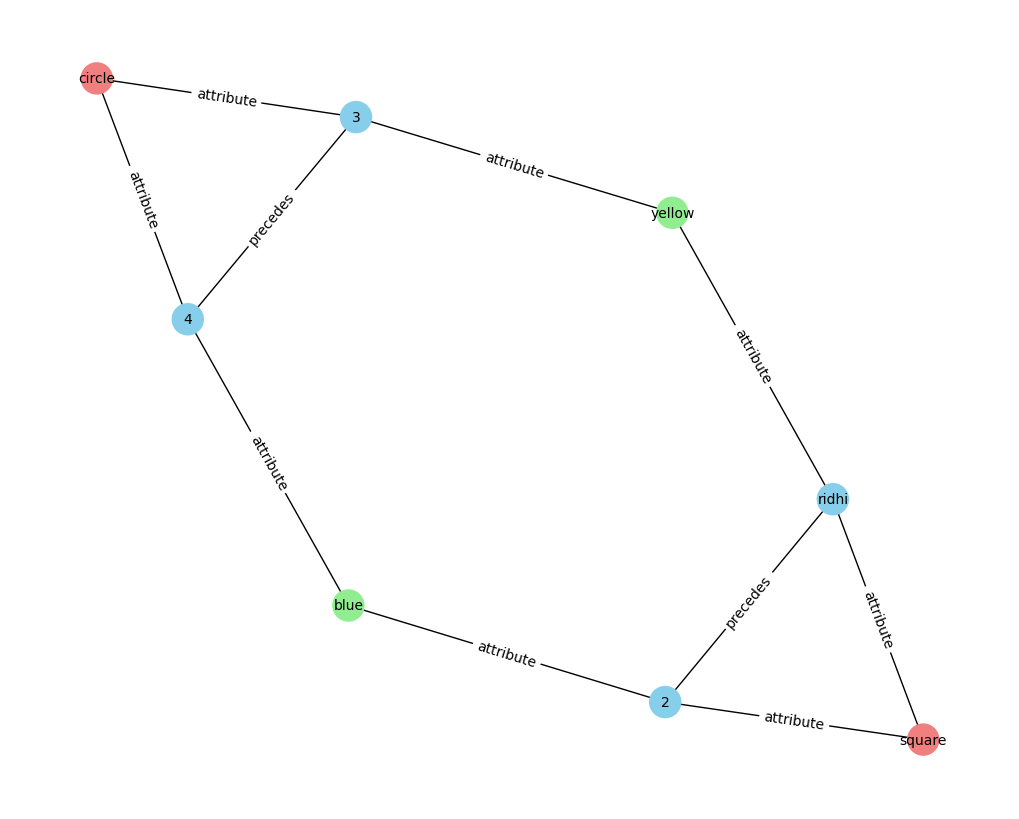

In [13]:
S.visualize()

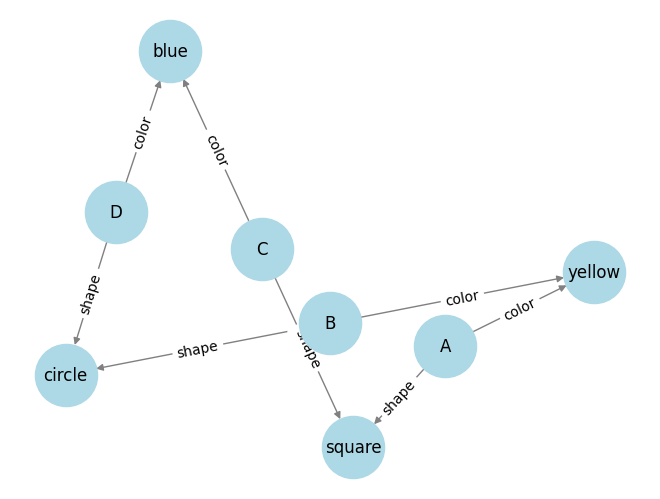

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()  # Directed graph

# Add nodes
objects = ["A", "B", "C", "D"]
colors = ["yellow", "blue"]
shapes = ["square", "circle"]

G.add_nodes_from(objects)  # Object nodes
G.add_nodes_from(colors + shapes)  # Attribute nodes

# Add directed edges with labels
edges = [
    ("A", "yellow", "color"), ("A", "square", "shape"),
    ("B", "yellow", "color"), ("B", "circle", "shape"),
    ("C", "blue", "color"), ("C", "square", "shape"),
    ("D", "blue", "color"), ("D", "circle", "shape"),
]

for obj, attr, label in edges:
    G.add_edge(obj, attr, label=label)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12, arrows=True)

# Draw edge labels
edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()


In [15]:
blue_objects = [u for u, v, d in G.edges(data=True) if v == "blue" and d["label"] == "color"]
print(blue_objects)  # Output: ['C', 'D']


['C', 'D']


In [16]:
def build_graph(element_set):
    G = nx.DiGraph()  # Create a directed graph
    for obj in element_set:
        G.add_node(obj.name)  # Add object as a node
        G.add_node(obj.attribute1)  # Add color as a node
        G.add_edge(obj.name, obj.attribute1, label="attribute1")  # Add directed edge with label
        if obj.attribute2:
            # If the object has a second attribute, add it as a node and edge
            G.add_node(obj.attribute2)  # Add shape as a node
            G.add_edge(obj.name, obj.attribute2, label="attribute2")  # Add directed edge with label
    return G

In [17]:
obj1 = Element("1", "yellow", "square")
obj2 = Element("2", "blue", "square") 
obj3 = Element("3", "yellow", "circle")
obj4 = Element("4", "blue", "circle")

S = {obj1, obj2, obj3, obj4}  # Set of elements

# Build graph
G = build_graph(S)

# Print edges with labels
for u, v, d in G.edges(data=True):
    print(f"{u} --({d['label']})--> {v}")

4 --(attribute1)--> blue
4 --(attribute2)--> circle
3 --(attribute1)--> yellow
3 --(attribute2)--> circle
2 --(attribute1)--> blue
2 --(attribute2)--> square
1 --(attribute1)--> yellow
1 --(attribute2)--> square
